# THE BIG BANG THEORY

<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/7/7b/The_Big_Bang_Theory_%28Official_Title_Card%29.png/330px-The_Big_Bang_Theory_%28Official_Title_Card%29.png" alt="The Big Bang Theory" style="width: 200px;"/>
    <p style="margin-left: 20px;">
        <strong><em>"The Big Bang Theory"</em></strong> is a popular American television sitcom created by Chuck Lorre and Bill Prady. It originally aired on CBS from <strong><em>September 24, 2007,</em></strong> to <strong><em>May 16, 2019,</em></strong> spanning a total of twelve seasons. The show is known for its witty humor, clever writing, and endearing characters, particularly the group of socially awkward but brilliant physicists at Caltech University.
    </p>
</div>





## Using Web Scraping to Extract data from Wikipedia

Here we performed **web scraping methods** on _"The Big Bang Theory"_ Wikipedia page to extract some statistics and organize them into a DataFrame for further analysis.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/The_Big_Bang_Theory'

# Fetch the HTML content of the Wikipedia page
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print("Failed to retrieve page")

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing viewership statistics
table = soup.find('table', {'class': 'wikitable plainrowheaders'})

# Extract data from the table
data = []
for row in table.find_all('tr'):
    columns = row.find_all(['th', 'td'])
    if len(columns) == 8:  # Ensure it's a data row
        season = columns[0].text.strip()
        episodes = columns[1].text.strip()
        # Extract year from First aired and format them as 'YYYY'
        year = re.search(r'\d{4}', columns[2].text.strip()).group()
        # Remove brackets and their contents from viewers rank and 18-49 rank
        viewers_rank = re.sub(r'\[.*?\]', '', columns[4].text.strip())
        viewers_million = re.sub(r'\[.*?\]', '', columns[5].text.strip())
        _18_49_rank = re.sub(r'\[.*?\]', '', columns[6].text.strip())
        data.append((season, episodes, year, viewers_rank, viewers_million, _18_49_rank))

# Create DataFrame from the extracted data
df = pd.DataFrame(data, columns=['Season', 'Episodes', 'Year', 'Viewers rank', 'U.S. Viewers (millions)', '18–49 rank'])

# Print DataFrame
print(df)


   Season Episodes  Year Viewers rank U.S. Viewers (millions) 18–49 rank
0       1       17  2007           68                    8.34         46
1       2       23  2008           40                   10.07          —
2       3       23  2009           12                   14.22          5
3       4       24  2010           13                   13.21          7
4       5       24  2011            8                   15.82          6
5       6       24  2012            3                   18.68          2
6       7       24  2013            2                   19.96          2
7       8       24  2014            2                   19.05          4
8       9       24  2015            2                   20.36          3
9      10       24  2016            2                   18.99          3
10     11       24  2017            1                   18.63          5
11     12       24  2018            2                   17.31          6


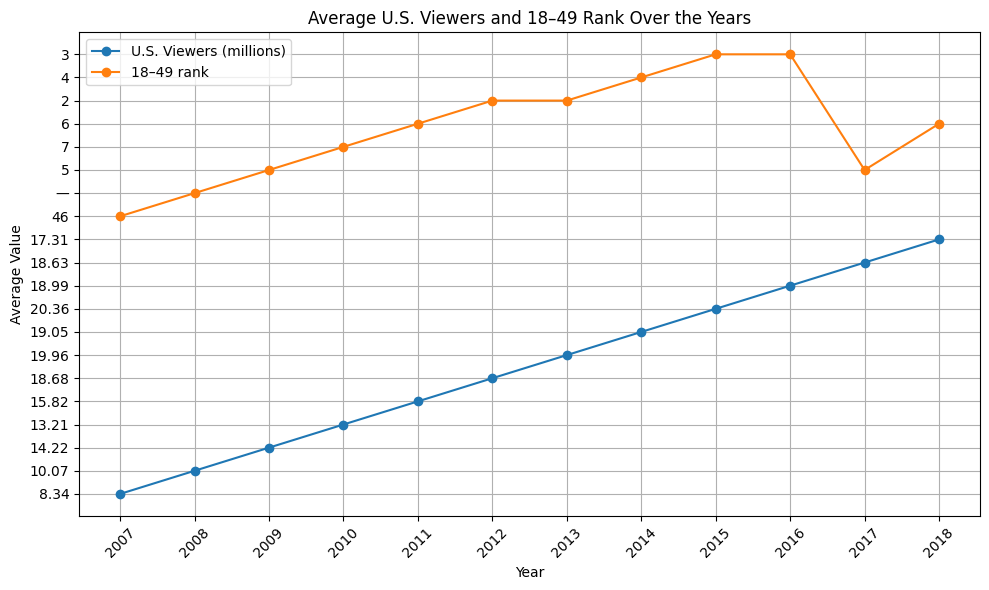

In [9]:
import matplotlib.pyplot as plt

# Plotting the ratings and viewership trends over the years
plt.figure(figsize=(10, 6))

# Plotting U.S. Viewers (millions)
plt.plot(df['Year'], df['U.S. Viewers (millions)'], marker='o', label='U.S. Viewers (millions)')

# Plotting 18–49 rank
plt.plot(df['Year'], df['18–49 rank'], marker='o', label='18–49 rank')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average U.S. Viewers and 18–49 Rank Over the Years')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
